### 텍스트 데이터 분석

* 세상에 존재하는 데이터의 약 80%는 비정형 데이터이고, 그 중에서 텍스트는 가장 기본적이고 광범위한 데이터 이다.


* 텍스트 분석의 종류
  - 텍스트의 의미나 개념을 찾거나 이해하기
  - 문서분류, 정보검색, 단어빈도분석 등
  

* 텍스트 분석 활용 분야
  - 스팸 필터링, 정보 검색, 소비자 인식 조사, 연구분야 탐색 등

### 샘플 문제

* 문제 : 뉴스 기사 제목에 등장하는 키워드 분석

1. 데이터 수집
  - 빅카인즈에서 뉴스 검색 및 데이터 수집
 
2. 데이터 전처리
  - 데이터프레임으로 불러와서, 제목 데이터 사용
  - 기호 제외

3. 데이터 분석 및 결과 시각화
  - 제목의 명사별 빈도수 -> 히스토그램, 워드클라우드

In [35]:
# 외부 라이브러리 설치
!pip install WordCloud konlpy

In [36]:
import pandas as pd

df = pd.read_excel('./NewsResult_20220426-20220726.xlsx', sheet_name='sheet', engine='openpyxl')
df.head()

C:\Users\jangg\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,2.100801e+06,20220726,아시아경제,호남취재본부 이준경,"전남도교육청, 고교학점제 ‘꿈키움캠퍼스’ 운영",사회>교육_시험,지역>경기,지역>강원,NaN,NaN,NaN,박경희,"지리산생태탐방원,호남,전남,구례고,광주","진로,전남대,한국외대,목포대,지리산생태탐방원,전남,서울권,전남도교육청,광주교대","전남도교육청,고교학점,꿈키움,캠퍼스,운영,전남도교육청,일반,도내,학생,대상,고교,학...","고교학점제,꿈키움캠퍼스,전남,전남도교육청,학생들,꿈키움,박경희,지리산생태탐방원,특목...",[아시아경제 호남취재본부 이준경 기자] 전남도교육청은 26일 도내 일반고 학생 39...,https://view.asiae.co.kr/article/2022072615520...,NaN
1,2.100501e+06,20220726,파이낸셜뉴스,강인 기자 (kang1231@fnnews.com),"전북도-전북교육청-대학, 교육 협력 체계 확립",지역>전북,사회>교육_시험,지역>대전,NaN,NaN,NaN,"김관영,서거석,박맹수","전북도,전주,전북지역대학총장협의회,전북도-전북교육청-대학,전북지역대학총장협의회장,전...","전북도,진로,전북교육청,전북도-전북교육청-대학,전북,실무위원회,교육감,전북교육감","전북도,전북교육청,대학,교육,협력,체계,확립,전북도,전북교육청,지역대학,교육,협력,...","전북도,전북,김관영,지역대학,서거석,전북교육청,교육감,박맹수,미래교육,추진단,도지사...","26일 전북도와 전북교육청, 지역대학이 교육 협력 추진체계 구축을 위한 협약을 맺었...",http://www.fnnews.com/news/202207261136329579,NaN
2,2.100701e+06,20220726,헤럴드경제,박대성 기자,"학교 이전 밀어붙인 순천 강남여고, 사립학교법 위반 고발 당해",사회>교육_시험,지역>강원,지역>전남,NaN,NaN,NaN,장경순,"강남,순천,전남,선월지구,순천시,조례동,조례호수공원","사립학교법,순천시의회,MOU,도교육청,중국,경찰,순천경찰서,순천,강남여고,전남교육청...","학교,순천,강남여고,고발,사립학교,위반,고발,전남,순천시,소재,강남여자고등학교,학교...","강남여고,순천,조례동,강남,교육청,지역민,전남,사립학교,임시회,장경순,순천시,선월지...",[헤럴드경제(순천)=박대성 기자] 전남 순천시 소재 강남여자고등학교 학교법인 행사(...,http://biz.heraldcorp.com/view.php?ud=20220726...,NaN
3,2.100201e+06,20220726,머니투데이,전남=나요안|기자,"전남교육청, 고교학점제 '꿈키움캠퍼스' 여름 계절학기 운영",사회>교육_시험,지역>충남,문화>문화일반,NaN,NaN,NaN,박경희,"지리산생태탐방원,지구촌,전남,구례고,광주","진로,전남대,한국외대,목포대,지리산생태탐방원,교육감,전남,전남교육청,광주교대","전남교육청,고교학점제,꿈키움,캠퍼스,운영,여름,계절,학기,고교,공동교육과정,대학,연...","전남,공동교육과정,꿈키움캠퍼스,학생들,고교학점제,전남교육청,교육청,박경희,미래사회,...",[머니투데이 전남=나요안 기자] [고교와 대학 연계 공동교육과정 도내 일반고 학생 ...,http://news.moneytoday.co.kr/view/mtview.php?n...,NaN
4,1.400351e+06,20220726,중도일보,중도일보,[사설]현안 산적한 '국가교육위' 서둘러야,사회>교육_시험,정치>청와대,정치>선거,NaN,NaN,NaN,조희연,NaN,"전국시도교육감협의회,국가교육위원회,정부,민주당,위원회,국가교육위,교원,국회,교육부,...","현안,산적,국가교육위,정책,중장기,교육,수립,국가교육위원회,출범,단계,난항,제정,국...","국가교육위,교육위,위원회,교육부,국가교육위원회,관련법,조희연,민주당,합의체,중장기,...",중장기 교육 정책을 수립하는 국가교육위원회가 출범 단계에서부터 난항을 겪고 있다. ...,http://www.joongdo.co.kr/web/view.php?key=2022...,NaN


In [37]:
df_title = df[['제목']]
df_title.head()

,제목
0,"전남도교육청, 고교학점제 ‘꿈키움캠퍼스’ 운영"
1,"전북도-전북교육청-대학, 교육 협력 체계 확립"
2,"학교 이전 밀어붙인 순천 강남여고, 사립학교법 위반 고발 당해"
3,"전남교육청, 고교학점제 '꿈키움캠퍼스' 여름 계절학기 운영"
4,[사설]현안 산적한 '국가교육위' 서둘러야


In [38]:
# 데이터에서 명사만 추출하기
# Okt (Open Korean Text), https://konlpy.org/ko/v0.6.0/api/konlpy.tag/#konlpy.tag._okt.Okt
from konlpy.tag import Okt

okt = Okt()
df_title_string = df_title.to_string()
result = okt.nouns(df_title_string)
print(result)

['제목', '전남도', '교육청', '고교', '학점', '제', '꿈', '캠퍼스', '운영', '전북도', '전북', '교육청', '대학', '교육', '협력', '체계', '확립', '학교', '이전', '순천', '강남', '여고', '사립학교법', '위반', '고발', '전남', '교육청', '고교', '학점', '제', '꿈', '캠퍼스', '여름', '계절', '학기', '운영', '사설', '현안', '산적', '국가', '교육', '위', '전북', '교육', '협력', '추진', '체계', '구축', '시동', '실무', '위', '산과학', '코로나', '로', '지역', '고교생', '학습', '결손', '해소', '전북도', '도', '교육청', '대학', '교육', '간다', '대구대', '경북', '진로', '진학', '교과', '교육', '연구', '회', '연수', '실시', '사설', '고교', '학점', '제', '시행', '준비', '혼란', '조희연', '서울', '직업', '반도체', '전사', '명', '전면', '시행', '고교', '학점', '제', '안정', '정착', '인하', '대학', '인하', '위드', '아이', '청소년', '진로', '지원', '센터', '학년', '파주', '특성화고', '설명', '회', '현장', '스케치', '운정', '학년', '입학', '설명', '회', '성황리', '개최', '수시', '합격', '생', '릴레이', '인터뷰', '한국', '에너지', '공대', '이선아', '학년', '고교', '탐방', '용', '여자', '고등학교', '교사', '연구', '활동', '학습', '공동체', '교육', '연구', '회', '경기도', '국어교육', '연구', '회', '장훈고', '일반', '전환', '신청', '자사고', '포기', '전교조', '고교', '교사', '고교', '학점', '제로', '업무', '정부', '초', '중등', '공교육', '예산', '삭감

In [39]:
# 단어별 빈도수 출력하기
# Counter, https://docs.python.org/ko/3/library/collections.html#collections.Counter
from collections import Counter

count = Counter(result)
count.most_common()

[('교육', 271),
 ('고교', 187),
 ('제', 136),
 ('학점', 121),
 ('교육감', 108),
 ('교육청', 89),
 ('대학', 70),
 ('지원', 60),
 ('학교', 49),
 ('기여', 46),
 ('선정', 45),
 ('사업', 41),
 ('정부', 40),
 ('학생', 40),
 ('후보', 40),
 ('교육과정', 39),
 ('정책', 38),
 ('진로', 37),
 ('미래', 36),
 ('개최', 32),
 ('자사고', 31),
 ('운영', 27),
 ('회', 27),
 ('것', 27),
 ('교육부', 26),
 ('과제', 25),
 ('유은혜', 24),
 ('충북', 23),
 ('교육지원청', 23),
 ('위', 21),
 ('명', 21),
 ('교사', 21),
 ('박람회', 21),
 ('확대', 21),
 ('설명', 20),
 ('학력', 19),
 ('연속', 19),
 ('진학', 18),
 ('강화', 18),
 ('교원', 18),
 ('대입', 18),
 ('서울', 17),
 ('교', 17),
 ('새', 17),
 ('연수', 16),
 ('학년', 16),
 ('고등학교', 16),
 ('전환', 16),
 ('학부모', 16),
 ('정시', 16),
 ('부금', 16),
 ('추진', 15),
 ('지역', 15),
 ('한국', 15),
 ('중', 15),
 ('도입', 15),
 ('우리', 15),
 ('전남', 14),
 ('대전', 14),
 ('경기', 14),
 ('반대', 14),
 ('전북', 13),
 ('반도체', 13),
 ('초', 13),
 ('역량', 13),
 ('공동', 13),
 ('개편', 13),
 ('울산', 13),
 ('입시', 13),
 ('총장', 13),
 ('현장', 12),
 ('예산', 12),
 ('세종시', 12),
 ('대비', 12),
 ('폐지', 12),
 ('대상', 12),


In [40]:
# 불용어(불필요한 단어) 제거하기
stop_words = {'제', '회', '것', '위', '명', '교', '새', '중', '초', '안', '수', '곳'}

result_new = []
for w in result:
    if w not in stop_words:
        result_new.append(w)

print(result_new)

['제목', '전남도', '교육청', '고교', '학점', '꿈', '캠퍼스', '운영', '전북도', '전북', '교육청', '대학', '교육', '협력', '체계', '확립', '학교', '이전', '순천', '강남', '여고', '사립학교법', '위반', '고발', '전남', '교육청', '고교', '학점', '꿈', '캠퍼스', '여름', '계절', '학기', '운영', '사설', '현안', '산적', '국가', '교육', '전북', '교육', '협력', '추진', '체계', '구축', '시동', '실무', '산과학', '코로나', '로', '지역', '고교생', '학습', '결손', '해소', '전북도', '도', '교육청', '대학', '교육', '간다', '대구대', '경북', '진로', '진학', '교과', '교육', '연구', '연수', '실시', '사설', '고교', '학점', '시행', '준비', '혼란', '조희연', '서울', '직업', '반도체', '전사', '전면', '시행', '고교', '학점', '안정', '정착', '인하', '대학', '인하', '위드', '아이', '청소년', '진로', '지원', '센터', '학년', '파주', '특성화고', '설명', '현장', '스케치', '운정', '학년', '입학', '설명', '성황리', '개최', '수시', '합격', '생', '릴레이', '인터뷰', '한국', '에너지', '공대', '이선아', '학년', '고교', '탐방', '용', '여자', '고등학교', '교사', '연구', '활동', '학습', '공동체', '교육', '연구', '경기도', '국어교육', '연구', '장훈고', '일반', '전환', '신청', '자사고', '포기', '전교조', '고교', '교사', '고교', '학점', '제로', '업무', '정부', '중등', '공교육', '예산', '삭감', '계획', '반발', '세종', '충북', '학교', '학부모', '연합', '중등', '교육', '예산', '

In [41]:
# 불용어를 제거한 후 단어별 빈도수 출력하기
count = Counter(result_new)

# 빈도수가 가장 높은 것 부터 출력하기
tags = count.most_common()
tags

[('교육', 271),
 ('고교', 187),
 ('학점', 121),
 ('교육감', 108),
 ('교육청', 89),
 ('대학', 70),
 ('지원', 60),
 ('학교', 49),
 ('기여', 46),
 ('선정', 45),
 ('사업', 41),
 ('정부', 40),
 ('학생', 40),
 ('후보', 40),
 ('교육과정', 39),
 ('정책', 38),
 ('진로', 37),
 ('미래', 36),
 ('개최', 32),
 ('자사고', 31),
 ('운영', 27),
 ('교육부', 26),
 ('과제', 25),
 ('유은혜', 24),
 ('충북', 23),
 ('교육지원청', 23),
 ('교사', 21),
 ('박람회', 21),
 ('확대', 21),
 ('설명', 20),
 ('학력', 19),
 ('연속', 19),
 ('진학', 18),
 ('강화', 18),
 ('교원', 18),
 ('대입', 18),
 ('서울', 17),
 ('연수', 16),
 ('학년', 16),
 ('고등학교', 16),
 ('전환', 16),
 ('학부모', 16),
 ('정시', 16),
 ('부금', 16),
 ('추진', 15),
 ('지역', 15),
 ('한국', 15),
 ('도입', 15),
 ('우리', 15),
 ('전남', 14),
 ('대전', 14),
 ('경기', 14),
 ('반대', 14),
 ('전북', 13),
 ('반도체', 13),
 ('역량', 13),
 ('공동', 13),
 ('개편', 13),
 ('울산', 13),
 ('입시', 13),
 ('총장', 13),
 ('현장', 12),
 ('예산', 12),
 ('세종시', 12),
 ('대비', 12),
 ('폐지', 12),
 ('대상', 12),
 ('논란', 12),
 ('선택', 12),
 ('양성', 12),
 ('진보', 12),
 ('공약', 12),
 ('국정', 12),
 ('아이', 11),
 ('일반', 11),
 ('중등

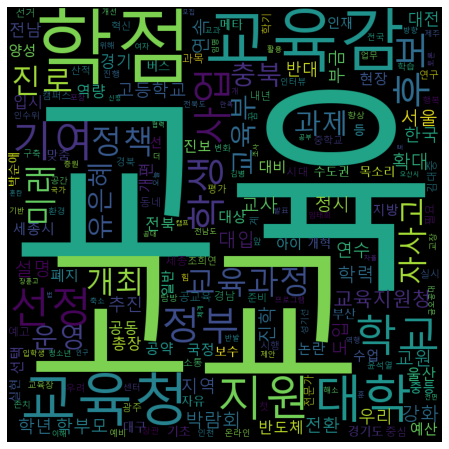

In [42]:
# 워드클라우드 만들기
# WordCloud, https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
from wordcloud import WordCloud

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(10,8))
plt.imshow(gen)
plt.axis('off')
plt.show()

### 더 생각해보기

* 워드 클라우드 결과를 어떻게 해석해야 할까?

* 다른 이슈에 대해 데이터 수집(뉴스 기사 제목)하여 분석해 보자.